In [1]:
# https://www.kaggle.com/wordsforthewise/lending-club

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline

In [3]:
df0 = pd.read_csv('data/lending_club_info.csv',index_col='LoanStatNew')

In [4]:
def feats_info(feature):
    print(df0.loc[feature]['Description'])

In [5]:
feats_info('mort_acc')

Number of mortgage accounts.


In [6]:
df = pd.read_csv('data/lending_club_loan_two.csv')

In [7]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [8]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<AxesSubplot:xlabel='loan_status', ylabel='count'>

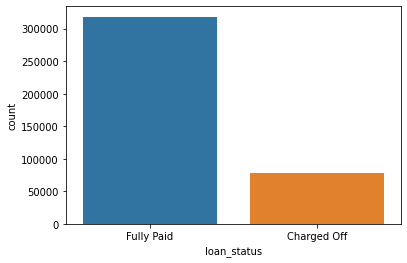

In [10]:
sns.countplot(x='loan_status',data=df)

c:\Users\antho\anaconda3\envs\mytfenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 45000.0)

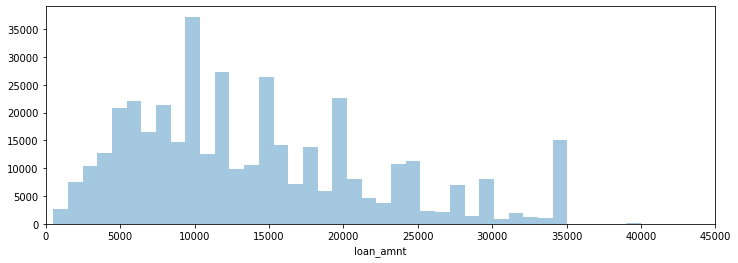

In [11]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40,fit=None)
plt.xlim(0,45000)

In [12]:
df.corr().transpose()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

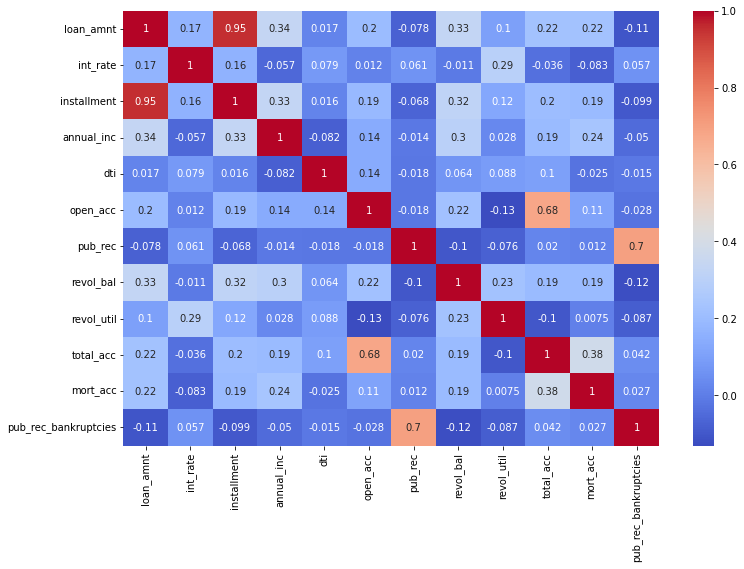

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [14]:
feats_info('installment')
feats_info('loan_amnt')

The monthly payment owed by the borrower if the loan originates.
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [15]:
list = []
for i in df.columns:
    list.append(i)
print(list)

['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address']


In [16]:
df.corr()['loan_amnt'].sort_values(ascending=False)

loan_amnt               1.000000
installment             0.953929
annual_inc              0.336887
revol_bal               0.328320
total_acc               0.223886
mort_acc                0.222315
open_acc                0.198556
int_rate                0.168921
revol_util              0.099911
dti                     0.016636
pub_rec                -0.077779
pub_rec_bankruptcies   -0.106539
Name: loan_amnt, dtype: float64

In [17]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [18]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

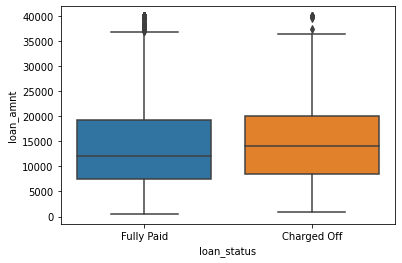

In [19]:
sns.boxplot(x="loan_status",y='loan_amnt',data=df)

In [20]:
# df.dtypes

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

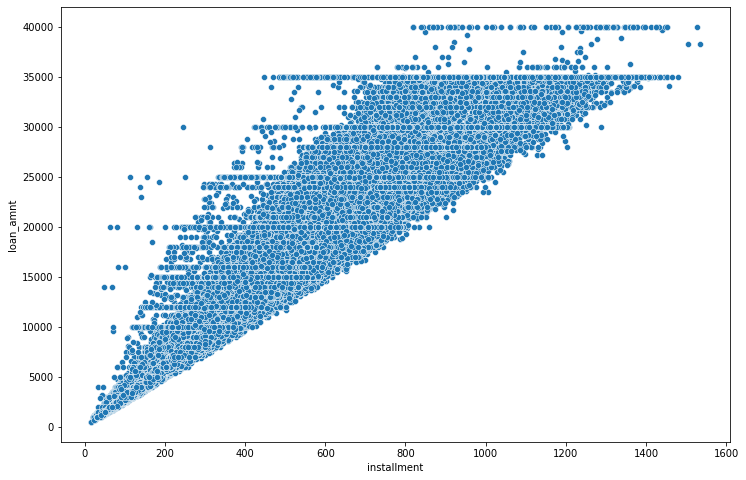

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='installment',y='loan_amnt',data=df)

In [22]:
# sorted(df['grade'].unique())

In [23]:
sort_subg = sorted(df['sub_grade'].unique())

<AxesSubplot:xlabel='grade', ylabel='count'>

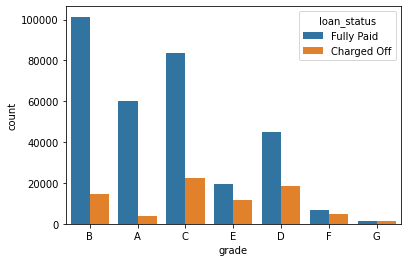

In [24]:
sns.countplot(x='grade',data=df, hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

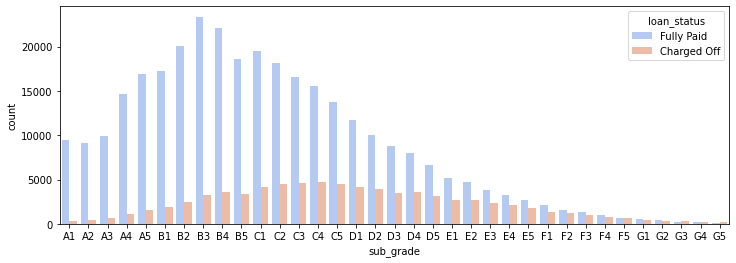

In [25]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,palette='coolwarm',order=sort_subg, hue='loan_status')

In [26]:
df = df.drop('grade',axis=1)

In [27]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [28]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [29]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

<AxesSubplot:>

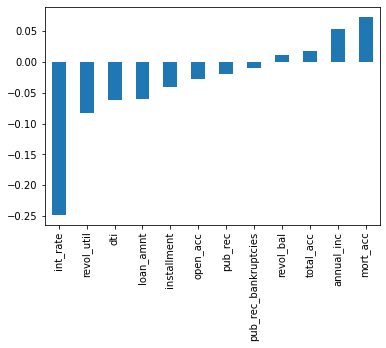

In [30]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [31]:
df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [32]:
df['emp_title'].nunique()

173105

In [33]:
df=df.drop('emp_title',axis=1)

In [34]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [35]:
sorted_emp_length = ['< 1 year',
                    '1 year',
                    '2 years',
                    '3 years',
                    '4 years',
                    '5 years',
                    '6 years',
                    '7 years',
                    '8 years',
                    '9 years',
                    '10+ years',
                    ]

<AxesSubplot:xlabel='emp_length', ylabel='count'>

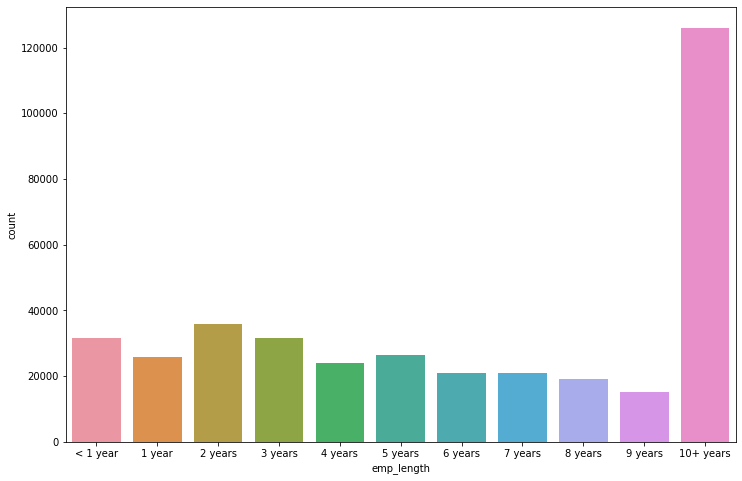

In [36]:
plt.figure(figsize=(12,8))
sns.countplot(x='emp_length',order=sorted_emp_length,data=df)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

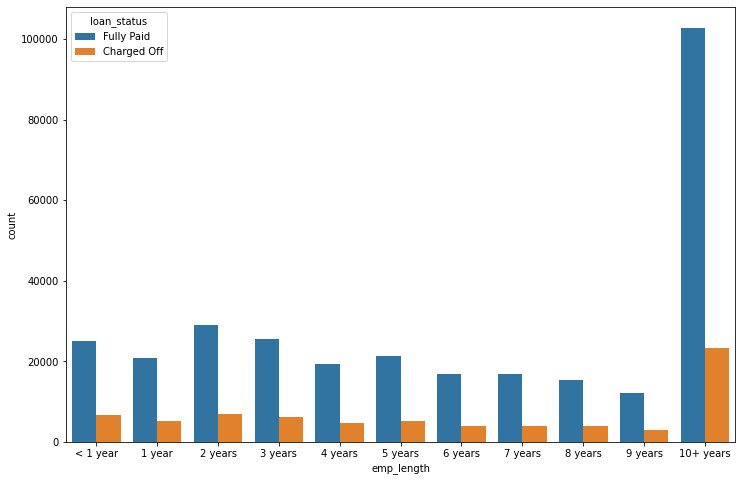

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(x='emp_length',order=sorted_emp_length,data=df,hue='loan_status')

In [38]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [39]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [40]:
emp_len = emp_co/emp_fp

<AxesSubplot:xlabel='emp_length'>

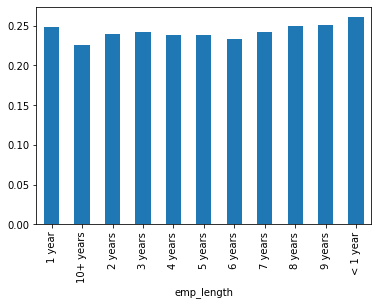

In [41]:
emp_len.plot(kind='bar')

In [42]:
df = df.drop('emp_length',axis=1)

In [43]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [44]:
df['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [45]:
df = df.drop('title',axis=1)

In [46]:
df['purpose'].nunique()

14

In [47]:
df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [48]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [49]:
def total_acc_avg(mort_acc,total_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
df['mort_acc'] = df.apply(lambda x: total_acc_avg(x['total_acc'],x['mort_acc']),axis=1)

In [50]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [51]:
df['revol_util']

0         41.8
1         53.3
2         92.2
3         21.5
4         69.8
          ... 
396025    34.3
396026    95.7
396027    66.9
396028    53.8
396029    91.3
Name: revol_util, Length: 396030, dtype: float64

In [52]:
df = df.drop(['revol_util','pub_rec_bankruptcies'],axis=1)

In [53]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

In [54]:
df.select_dtypes('object').columns

Index(['term', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [55]:
df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [56]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [57]:
df['term'].value_counts()

36    302005
60     94025
Name: term, dtype: int64

In [58]:
df.select_dtypes('object').columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [59]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
subgrade_dummies
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [60]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'address', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [61]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [62]:
df['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [63]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [64]:
df['initial_list_status'].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [65]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [66]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
df = df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [67]:
df.select_dtypes('object').columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [68]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [69]:
df['home_ownership'] = df['home_ownership'].replace(['ANY','NONE'],'OTHERS')

In [70]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [71]:
df.select_dtypes('object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [72]:
df = df.drop('issue_d', axis=1)

In [73]:
df['earliest_cr_line'].unique()

array(['Jun-1990', 'Jul-2004', 'Aug-2007', 'Sep-2006', 'Mar-1999',
       'Jan-2005', 'Aug-2005', 'Sep-1994', 'Jun-1994', 'Dec-1997',
       'Dec-1990', 'May-1984', 'Apr-1995', 'Jan-1997', 'May-2001',
       'Mar-1982', 'Sep-1996', 'Jan-1990', 'Mar-2000', 'Jan-2006',
       'Oct-2006', 'Jan-2003', 'May-2008', 'Oct-2003', 'Jun-2004',
       'Jan-1999', 'Apr-1994', 'Apr-1998', 'Jul-2007', 'Apr-2002',
       'Oct-2007', 'Jun-2009', 'May-1997', 'Jul-2006', 'Sep-2003',
       'Aug-1992', 'Dec-1988', 'Feb-2002', 'Jan-1992', 'Aug-2001',
       'Dec-2010', 'Oct-1999', 'Sep-2004', 'Aug-1994', 'Jul-2003',
       'Apr-2000', 'Dec-2004', 'Jun-1995', 'Dec-2003', 'Jul-1994',
       'Oct-1990', 'Dec-2001', 'Apr-1999', 'Feb-1995', 'May-2003',
       'Oct-2002', 'Mar-2004', 'Aug-2003', 'Oct-2000', 'Nov-2004',
       'Mar-2010', 'Mar-1996', 'May-1994', 'Jun-1996', 'Nov-1986',
       'Jan-2001', 'Jan-2002', 'Mar-2001', 'Sep-2012', 'Apr-2006',
       'May-1998', 'Dec-2002', 'Nov-2003', 'Oct-2005', 'May-19

In [74]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda year:int(year[-4:]))

In [75]:
df = df.drop('earliest_cr_line',axis=1)

In [76]:
df.select_dtypes('object').columns

Index(['loan_status', 'address'], dtype='object')

In [77]:
def extract_zip(address):
    return address[-5:]

In [78]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [79]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [80]:
df.select_dtypes('object').columns

Index(['loan_status'], dtype='object')

In [81]:
df = df.drop('loan_status',axis=1) # We have loan_repaid for binary classification

In [82]:
df.shape

(396030, 78)

Train Test Split

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [84]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
model = Sequential()

model.add(Dense(69,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(34,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [88]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [89]:
model.fit(x=X_train,
          y=y_train,
         epochs=25,
         batch_size=256,
         validation_data=(X_test,y_test), 
         callbacks=[early_stop])

Epoch 1/25
1238/1238 [==============================] - 9s 7ms/step - loss: 0.3076 - val_loss: 0.2656
Epoch 2/25
1238/1238 [==============================] - 8s 7ms/step - loss: 0.2676 - val_loss: 0.2627
Epoch 3/25
1238/1238 [==============================] - 8s 7ms/step - loss: 0.2644 - val_loss: 0.2626
Epoch 4/25
1238/1238 [==============================] - 8s 7ms/step - loss: 0.2629 - val_loss: 0.2622
Epoch 5/25
1238/1238 [==============================] - 8s 7ms/step - loss: 0.2623 - val_loss: 0.2624
Epoch 6/25
1238/1238 [==============================] - 8s 7ms/step - loss: 0.2616 - val_loss: 0.2621
Epoch 7/25
1238/1238 [==============================] - 8s 7ms/step - loss: 0.2613 - val_loss: 0.2618
Epoch 8/25
1238/1238 [==============================] - 8s 7ms/step - loss: 0.2608 - val_loss: 0.2615
Epoch 9/25
1238/1238 [==============================] - 8s 7ms/step - loss: 0.2608 - val_loss: 0.2621
Epoch 10/25
1238/1238 [==============================] - 8s 7ms/step - loss: 0.260

Evaluate the model

In [90]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

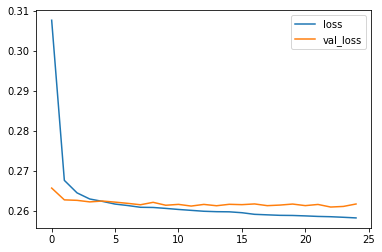

In [91]:
loss.plot()

In [92]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2476/2476 [==============================] - 4s 1ms/step


In [93]:
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15577
           1       0.88      1.00      0.93     63629

    accuracy                           0.89     79206
   macro avg       0.94      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [95]:
confusion_matrix(y_test,predictions)

array([[ 6718,  8859],
       [   37, 63592]], dtype=int64)

In [96]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      24000.00
term              60.00
int_rate          13.11
installment      547.43
annual_inc     85000.00
                 ...   
30723              0.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 304691, Length: 77, dtype: float64

In [105]:
# CODE HERE
pred = (model.predict(new_customer.values.reshape(1,77)) > 0.5).astype("int32")

1/1 [==============================] - 0s 14ms/step


In [103]:
actual = df.iloc[random_ind]['loan_repaid']

In [107]:
print(f'actual: [{actual}]')
print(f'predicted: {pred}')

actual: [1.0]
predicted: [[1]]
